<a href="https://colab.research.google.com/github/SamoaChen/Frequentist-ML/blob/main/Linear_Regression_and_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question1/ Linear Regression Without Regularization

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


#RANDOMIZE DATA
prostate_data=pd.read_table('data.txt',usecols=[1,2,3,4,5,6,7,8,9])
prostate_train_data, prostate_remain_data = train_test_split(prostate_data, test_size=0.2, random_state=50, shuffle=True)
prostate_valid_data, prostate_test_data=train_test_split(prostate_remain_data, test_size=0.5, random_state=50, shuffle=True)


#form x and y sets
prostate_xtrain=prostate_train_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_ytrain=prostate_train_data[['lpsa']]
prostate_xvalid=prostate_valid_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_yvalid=prostate_valid_data[['lpsa']]
prostate_xtest=prostate_test_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_ytest=prostate_test_data[['lpsa']]


#NORMALIZE THE DATA SET
prostate_xtrain=(prostate_xtrain-prostate_xtrain.mean())/prostate_xtrain.std(ddof=1)
#prostate_xtrain = (prostate_xtrain-prostate_xtrain.min())/(prostate_xtrain.max()-prostate_xtrain.min())
prostate_xvalid=(prostate_xvalid-prostate_xvalid.mean())/prostate_xvalid.std(ddof=1)
#prostate_xvalid = (prostate_xvalid-prostate_xvalid.min())/(prostate_xvalid.max()-prostate_xvalid.min())
prostate_xtest=(prostate_xtest-prostate_xtest.mean())/prostate_xtest.std(ddof=1)
#prostate_xtest = (prostate_xtest-prostate_xtest.min())/(prostate_xtest.max()-prostate_xtest.min())

#CALCULATE CORRELATION BETWEEN PREDICTORS
prostate_xdata=prostate_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_xdata.corr()



,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45
lcavol,1.000000,0.280521,0.225000,0.027350,0.538845,0.675310,0.432417,0.433652
lweight,0.280521,1.000000,0.347969,0.442264,0.155385,0.164537,0.056882,0.107354
age,0.225000,0.347969,1.000000,0.350186,0.117658,0.127668,0.268892,0.276112
lbph,0.027350,0.442264,0.350186,1.000000,-0.085843,-0.006999,0.077820,0.078460
svi,0.538845,0.155385,0.117658,-0.085843,1.000000,0.673111,0.320412,0.457648
lcp,0.675310,0.164537,0.127668,-0.006999,0.673111,1.000000,0.514830,0.631528
gleason,0.432417,0.056882,0.268892,0.077820,0.320412,0.514830,1.000000,0.751905
pgg45,0.433652,0.107354,0.276112,0.078460,0.457648,0.631528,0.751905,1.000000


In [ ]:
#CALCULATE BASELINE MSE
y_pred=np.full((prostate_ytest.shape[0], 1), prostate_ytest.mean())
MSE_base=mean_squared_error(prostate_ytest,y_pred)
print("MSE base value: ",MSE_base)

MSE base value:  1.9451406357463619


In [ ]:
#CALCULATE BETA MATRIX
X=np.ones((prostate_xtrain.shape[0],prostate_xtrain.shape[1]+1))
X[:,1:X.shape[1]]=prostate_xtrain[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
beta_base=np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(prostate_ytrain.to_numpy())
print("OLS calculated beta: \n",beta_base)

#CALCULATE Z SCORES
#calculate standard error
SE=prostate_xtrain.sem(axis=0).to_numpy().reshape(8,1)
SE=np.vstack((prostate_ytrain.sem(axis=0).to_numpy(),SE)) #standard error
z_score=np.divide(beta_base,SE) #z score
#form z score table
terms = ['Intercept', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45']
data = {'Term' : terms,
      'Coefficent' : beta_base.flatten(), 
      'Std. Error' : SE.flatten(), 
      'Z Score' : z_score.flatten()}
df2 = pd.DataFrame(data, columns=['Term', 'Coefficent', 'Std. Error', 'Z Score'])
df2


OLS calculated beta: 
 [[ 2.4404094 ]
 [ 0.64311659]
 [ 0.3202791 ]
 [-0.0111443 ]
 [ 0.05562283]
 [ 0.23779901]
 [-0.27814749]
 [-0.10482895]
 [ 0.34718478]]


,Term,Coefficent,Std. Error,Z Score
0,Intercept,2.440409,0.125244,19.485278
1,lcavol,0.643117,0.113961,5.643325
2,lweight,0.320279,0.113961,2.810438
3,age,-0.011144,0.113961,-0.097791
4,lbph,0.055623,0.113961,0.488088
5,svi,0.237799,0.113961,2.086678
6,lcp,-0.278147,0.113961,-2.440734
7,gleason,-0.104829,0.113961,-0.919870
8,pgg45,0.347185,0.113961,3.046534


In [ ]:

#CALCULATE MEAN SQUARE ERROR
#convert to numpy format
x_test=np.ones((prostate_xtest.shape[0],prostate_xtest.shape[1]+1))
x_test[:,1:x_test.shape[1]]=prostate_xtest.to_numpy()
y_test=prostate_ytest.to_numpy()
y_pred=x_test.dot(beta_base)
MSE_test=mean_squared_error(y_test, y_pred)

print("MSE for test set: ",MSE_test)


MSE for test set:  1.079297168345552


# QUESTION2/Ridge Regression

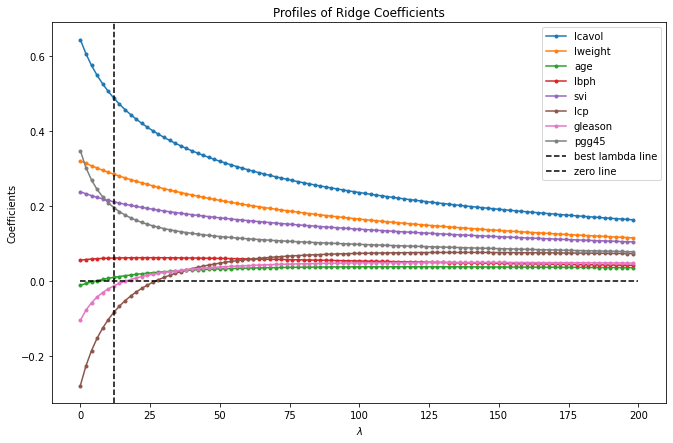

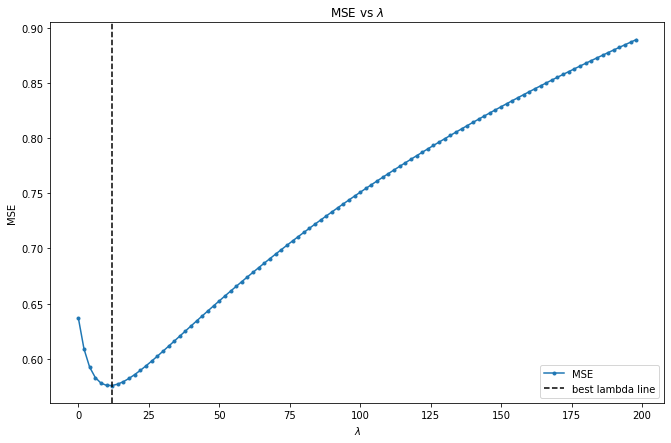

Optimal beta values: 
 [[ 2.4404094 ]
 [ 0.48719199]
 [ 0.28464171]
 [ 0.00979499]
 [ 0.06130655]
 [ 0.21118613]
 [-0.08323602]
 [-0.01294131]
 [ 0.19555855]]
MSE for test set: 0.9387715498862826


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt


#RANDOMIZE DATA
prostate_data=pd.read_table('data.txt',usecols=[1,2,3,4,5,6,7,8,9])
prostate_train_data, prostate_remain_data = train_test_split(prostate_data, test_size=0.2, random_state=50, shuffle=True)
prostate_valid_data, prostate_test_data=train_test_split(prostate_remain_data, test_size=0.5, random_state=50, shuffle=True)


#form x and y sets
prostate_xtrain=prostate_train_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_ytrain=prostate_train_data[['lpsa']]
prostate_xvalid=prostate_valid_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_yvalid=prostate_valid_data[['lpsa']]
prostate_xtest=prostate_test_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_ytest=prostate_test_data[['lpsa']]


#NORMALIZE THE DATA SET
prostate_xtrain=(prostate_xtrain-prostate_xtrain.mean())/prostate_xtrain.std(ddof=1)
#prostate_xtrain = (prostate_xtrain-prostate_xtrain.min())/(prostate_xtrain.max()-prostate_xtrain.min())
prostate_xvalid=(prostate_xvalid-prostate_xvalid.mean())/prostate_xvalid.std(ddof=1)
#prostate_xvalid = (prostate_xvalid-prostate_xvalid.min())/(prostate_xvalid.max()-prostate_xvalid.min())
prostate_xtest=(prostate_xtest-prostate_xtest.mean())/prostate_xtest.std(ddof=1)
#prostate_xtest = (prostate_xtest-prostate_xtest.min())/(prostate_xtest.max()-prostate_xtest.min())


#FORM THE TRAINING X MATRIX
X=prostate_xtrain[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']].to_numpy()

#FUNCTION FOR CALCULATING BETAS
def cal_beta(lamb):
  beta=np.linalg.inv(np.transpose(X).dot(X)+lamb*np.eye(X.shape[1])).dot(np.transpose(X)).dot(prostate_ytrain.to_numpy())
  #ridge_reg = Ridge(alpha=lamb)
  #ridge_reg.fit(X, prostate_ytrain)
  #beta = np.transpose(ridge_reg.coef_)
  return beta

#CALCULATE BETA VALUES CORRESPONDING TO DIFFERENT LAMBDA
#create matrix for storing plotting data
beta_matrix=np.empty([8, 1])
lambda_range=np.arange(0,200,2)

for lamb in lambda_range:
  if lamb==0:
    beta_matrix=cal_beta(lamb)
  else:
    beta_matrix=np.concatenate((beta_matrix,cal_beta(lamb)),axis=1)


#CALCULATE BETA_0
beta_0=prostate_ytrain.mean(axis=0).values


#SEARCH FOR THE BEST LAMBDA VALUE   
#validation sets convert to numpy form
x_valid=np.ones((prostate_xvalid.shape[0],prostate_xvalid.shape[1]+1))
x_valid[:,1:x_valid.shape[1]]=prostate_xvalid.to_numpy()
y_valid=prostate_yvalid.to_numpy()

#calculate MSE values for each beta value and plot them
MSE_array=np.array([]) #initiate lambda best
for lamb in lambda_range:
  beta_temp=cal_beta(lamb)
  beta_temp=np.vstack((beta_0,beta_temp))
  y_pred=x_valid.dot(beta_temp)
  MSE=mean_squared_error(y_valid, y_pred)
  MSE_array=np.append(MSE_array,MSE)

Optimal_lambda=2*(np.where(MSE_array==np.amin(MSE_array))[0])#find the optimal lambda value



#plotting for beta values
plt.figure(figsize=(11,7))

plt.plot(lambda_range,beta_matrix[0,:],marker='.', label="lcavol")
plt.plot(lambda_range,beta_matrix[1,:],marker='.', label="lweight")
plt.plot(lambda_range,beta_matrix[2,:],marker='.', label="age")
plt.plot(lambda_range,beta_matrix[3,:],marker='.', label="lbph")
plt.plot(lambda_range,beta_matrix[4,:],marker='.', label="svi")
plt.plot(lambda_range,beta_matrix[5,:],marker='.', label="lcp")
plt.plot(lambda_range,beta_matrix[6,:],marker='.', label="gleason")
plt.plot(lambda_range,beta_matrix[7,:],marker='.', label="pgg45")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.plot((0, 200), (0, 0), 'k--',label="zero line")
plt.title('Profiles of Ridge Coefficients')
plt.ylabel('Coefficients')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

#plotting for corresponding MSE
plt.figure(figsize=(11,7))
plt.plot(lambda_range,MSE_array,marker='.',label="MSE")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.title('MSE vs $\lambda$')
plt.ylabel('MSE')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

#CALCULATE MSE ON TEST SET WITH OPTIMAL LAMBDA VALUE
#convert test data to numpy form
x_test=np.ones((prostate_xtest.shape[0],prostate_xtest.shape[1]+1))
x_test[:,1:x_test.shape[1]]=prostate_xtest.to_numpy()
y_test=prostate_ytest.to_numpy()

#calculate optimal predited y vlaue
beta_optimal=np.vstack((beta_0,cal_beta(Optimal_lambda)))
y_pred=x_test.dot(beta_optimal)

#calculate the MSE value
MSE_test=mean_squared_error(y_test, y_pred)
print("Optimal beta values: \n",beta_optimal)
print("MSE for test set:",MSE_test)




The MSE value calculated for test set with Ridge regression is better than the value calculated with Linear regression  without regularization

# Question3/Lasso Regression

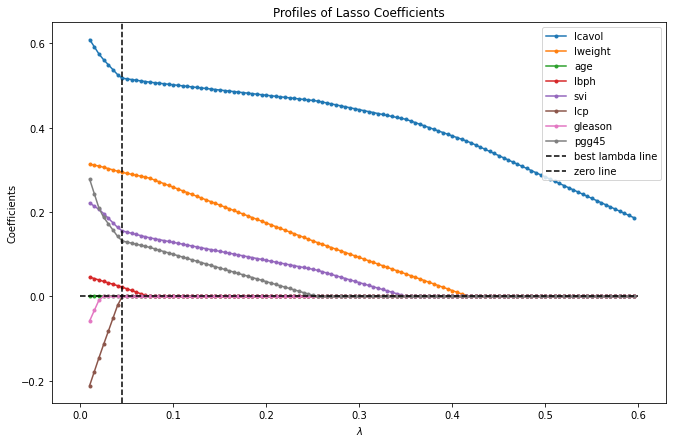

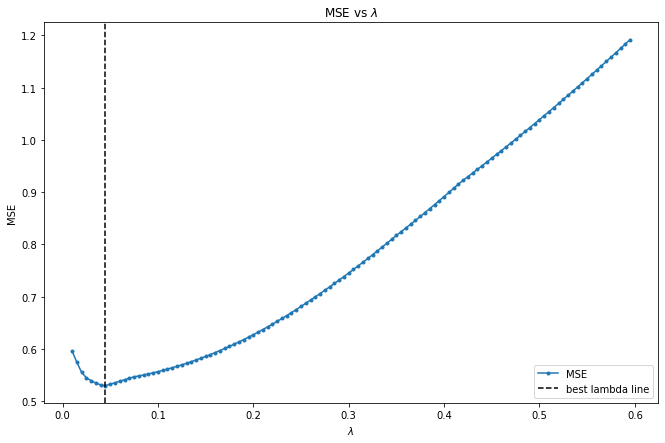

Optimal beta values: 
 [[ 2.4404094 ]
 [ 0.51738513]
 [ 0.29407386]
 [ 0.        ]
 [ 0.02211057]
 [ 0.15547344]
 [-0.        ]
 [-0.        ]
 [ 0.13151694]]
MSE for test set: 0.895144292610294


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
import numpy as np
import matplotlib.pyplot as plt


#RANDOMIZE DATA
prostate_data=pd.read_table('data.txt',usecols=[1,2,3,4,5,6,7,8,9])
prostate_train_data, prostate_remain_data = train_test_split(prostate_data, test_size=0.2, random_state=50, shuffle=True)
prostate_valid_data, prostate_test_data=train_test_split(prostate_remain_data, test_size=0.5, random_state=50, shuffle=True)


#form x and y sets
prostate_xtrain=prostate_train_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_ytrain=prostate_train_data[['lpsa']]
prostate_xvalid=prostate_valid_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_yvalid=prostate_valid_data[['lpsa']]
prostate_xtest=prostate_test_data[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']]
prostate_ytest=prostate_test_data[['lpsa']]

#NORMALIZE THE DATA SET
prostate_xtrain=(prostate_xtrain-prostate_xtrain.mean())/prostate_xtrain.std(ddof=1)
#prostate_xtrain = (prostate_xtrain-prostate_xtrain.min())/(prostate_xtrain.max()-prostate_xtrain.min())
prostate_xvalid=(prostate_xvalid-prostate_xvalid.mean())/prostate_xvalid.std(ddof=1)
#prostate_xvalid = (prostate_xvalid-prostate_xvalid.min())/(prostate_xvalid.max()-prostate_xvalid.min())
prostate_xtest=(prostate_xtest-prostate_xtest.mean())/prostate_xtest.std(ddof=1)
#prostate_xtest = (prostate_xtest-prostate_xtest.min())/(prostate_xtest.max()-prostate_xtest.min())


#FORM THE TRAINING X MATRIX
X=prostate_xtrain[['lcavol','lweight','age','lbph','svi','lcp','gleason','pgg45']].to_numpy()
#FORM THE y_train
y=prostate_ytrain.to_numpy()

#CALCULATE BETA_0
beta_0=prostate_ytrain.mean(axis=0).values

#LASSO REGRESSION FUNCTION
def cal_lasso(lamb):
  lasso=Lasso(alpha=lamb)
  lasso_coef=lasso.fit(X,y).coef_
  return lasso_coef

#PLOT FOR DIFFERENT BETA VALUES CORRESPONDING TO DIFFERENT LAMBDA
#create matrix for storing plotting data
beta_matrix=np.empty([8, 1])
lambda_range=np.arange(0.01,0.6,0.005)

for lamb in lambda_range:
  if lamb==0.01:
    beta_matrix=cal_lasso(lamb).reshape((8,1))
  else:
    beta_matrix=np.concatenate((beta_matrix,cal_lasso(lamb).reshape((8,1))),axis=1)


#FIND OPTIMAL LAMBDA
lambda_range=np.arange(0.01,0.6,0.005)

#validation sets convert to numpy form
x_valid=np.ones((prostate_xvalid.shape[0],prostate_xvalid.shape[1]+1))
x_valid[:,1:x_valid.shape[1]]=prostate_xvalid.to_numpy()
y_valid=prostate_yvalid.to_numpy()

#calculate MSE values for each beta
MSE_array=[] 
for lamb in lambda_range:
  beta_temp=cal_lasso(lamb)
  beta_temp=np.transpose(np.append(beta_0,beta_temp))
  y_pred=x_valid.dot(beta_temp)
  MSE=mean_squared_error(y_valid, y_pred)
  MSE_array=np.append(MSE_array,MSE)
 
Optimal_lambda=0.01+0.005*(np.where(MSE_array==np.amin(MSE_array))[0])#find the optimal lambda value

#plot feature coefficients vs lambda
plt.figure(figsize=(11,7))

plt.plot(lambda_range,beta_matrix[0,:],marker='.', label="lcavol")
plt.plot(lambda_range,beta_matrix[1,:],marker='.', label="lweight")
plt.plot(lambda_range,beta_matrix[2,:],marker='.', label="age")
plt.plot(lambda_range,beta_matrix[3,:],marker='.', label="lbph")
plt.plot(lambda_range,beta_matrix[4,:],marker='.', label="svi")
plt.plot(lambda_range,beta_matrix[5,:],marker='.', label="lcp")
plt.plot(lambda_range,beta_matrix[6,:],marker='.', label="gleason")
plt.plot(lambda_range,beta_matrix[7,:],marker='.', label="pgg45")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.plot((0, 0.6), (0, 0), 'k--',label="zero line")
plt.title('Profiles of Lasso Coefficients')
plt.ylabel('Coefficients')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

#plot for corresponding MSE
plt.figure(figsize=(11,7))
plt.plot(lambda_range,MSE_array,marker='.',label="MSE")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.title('MSE vs $\lambda$')
plt.ylabel('MSE')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

#CALCULATE MSE ON TEST SET WITH OPTIMAL LAMBDA VALUE
#convert test data to numpy form
x_test=np.ones((10,9))
x_test[:,1:9]=prostate_xtest.to_numpy()
y_test=prostate_ytest.to_numpy()

#calculate optimal predited y vlaue
beta_optimal=np.hstack((beta_0,cal_lasso(Optimal_lambda)))
y_pred=x_test.dot(beta_optimal)

#calculate the MSE value
MSE_test=mean_squared_error(y_test, y_pred)
print("Optimal beta values: \n",beta_optimal.reshape((9,1)))
print("MSE for test set:",MSE_test)

The MSE value improved again from the value resulted from Ridge regression, and Lasso regression elimited three beta values including 'age', 'lcp', and 'gleason'

# Question3 Continue/Red Wine Quality Prediction

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# IMPORTING AND CLEAN DATA
winequality_df = pd.read_csv("winequality-red.csv", sep=';', header='infer')


In [ ]:
winequality_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
# DIVIDE TO DATA SETS
train_data, remain_data = train_test_split(winequality_df, test_size=0.2, random_state=50, shuffle=True)
valid_data, test_data=train_test_split(remain_data, test_size=0.5, random_state=50, shuffle=True)


#form x and y sets
x_train=train_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_train=train_data[['quality']]
x_valid=valid_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_valid=valid_data[['quality']]
x_test=test_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_test=test_data[['quality']]

#replace nan to 0
x_train = x_train.replace(np.nan, 0)
y_train = y_train.replace(np.nan,0)
x_valid = x_valid.replace(np.nan, 0)
y_valid = y_valid.replace(np.nan, 0)
x_test = x_test.replace(np.nan, 0)
y_test = y_test.replace(np.nan, 0)

In [ ]:
##CALCULATE CORRELATION BETWEEN PREDICTORS
x_train.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
fixed acidity,1.000000,-0.259029,0.680483,0.118621,0.102504,-0.151063,-0.112800,0.671945,-0.689282,0.180062,-0.088824
volatile acidity,-0.259029,1.000000,-0.556101,0.010165,0.061664,0.005454,0.093010,0.025434,0.225414,-0.262122,-0.199327
citric acid,0.680483,-0.556101,1.000000,0.119735,0.192514,-0.074206,0.017406,0.367556,-0.536573,0.306791,0.089381
residual sugar,0.118621,0.010165,0.119735,1.000000,0.076165,0.199963,0.207340,0.355849,-0.079836,0.014158,0.042168
chlorides,0.102504,0.061664,0.192514,0.076165,1.000000,0.007710,0.047539,0.218738,-0.261835,0.365031,-0.220380
free sulfur dioxide,-0.151063,0.005454,-0.074206,0.199963,0.007710,1.000000,0.667819,-0.017206,0.068354,0.043818,-0.073339
total sulfur dioxide,-0.112800,0.093010,0.017406,0.207340,0.047539,0.667819,1.000000,0.077117,-0.061292,0.046820,-0.205110
density,0.671945,0.025434,0.367556,0.355849,0.218738,-0.017206,0.077117,1.000000,-0.355979,0.140178,-0.515157
pH,-0.689282,0.225414,-0.536573,-0.079836,-0.261835,0.068354,-0.061292,-0.355979,1.000000,-0.193201,0.231517
sulphates,0.180062,-0.262122,0.306791,0.014158,0.365031,0.043818,0.046820,0.140178,-0.193201,1.000000,0.096358


In [ ]:
#NORMALIZE DATA SETS
x_train=(x_train-x_train.mean())/x_train.std(ddof=0)
x_valid=(x_valid-x_valid.mean())/x_valid.std(ddof=0)
x_test=(x_test-x_test.mean())/x_test.std(ddof=0)
#x_train =(x_train-x_train.min())/(x_train.max()-x_train.min())
#x_valid =(x_valid-x_valid.min())/(x_valid.max()-x_valid.min())
#x_test =(x_test-x_test.min())/(x_test.max()-x_test.min())

In [ ]:
# PERFORM LINEAR REGRESSION WITHOUT REGULARIZATION
#calculate beta 
X=np.ones((x_train.shape[0],x_train.shape[1]+1))
X[:,1:X.shape[1]]=x_train
beta_base=np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y_train)

# CALCULATE Z-SCORE
#calculate standard error
SE=x_train.sem(axis=0).to_numpy().reshape(x_train.shape[1],1)
SE=np.vstack((y_train.sem(axis=0).to_numpy(),SE)) #standard error
z_score=np.divide(beta_base,SE) #z score
#form z score table
terms = ['Intercept', 'fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']
data = {'Term' : terms,
      'Coefficent' : beta_base.flatten(), 
      'Std. Error' : SE.flatten(), 
      'Z Score' : z_score.flatten()}
df2 = pd.DataFrame(data, columns=['Term', 'Coefficent', 'Std. Error', 'Z Score'])
df2

,Term,Coefficent,Std. Error,Z Score
0,Intercept,5.666927,0.022725,249.372497
1,fixed acidity,0.037709,0.027973,1.348072
2,volatile acidity,-0.210501,0.027973,-7.525233
3,citric acid,-0.051476,0.027973,-1.840239
4,residual sugar,0.014612,0.027973,0.522349
5,chlorides,-0.097141,0.027973,-3.472696
6,free sulfur dioxide,0.058819,0.027973,2.102739
7,total sulfur dioxide,-0.114235,0.027973,-4.083801
8,density,-0.027487,0.027973,-0.982629
9,pH,-0.062294,0.027973,-2.226944


The Z-score shows significant features, including 'volatile acidity','chlorides','total sulfur dioxide','pH','sulphates','alcohol'




In [ ]:
#CALCULATE MEAN SQUARE ERROR
#convert to numpy format
X_test=np.ones((x_test.shape[0],x_test.shape[1]+1))
X_test[:,1:X_test.shape[1]]=x_test.to_numpy()
y_pred=X_test.dot(beta_base)
y_test=y_test.to_numpy()
MSE_test=mean_squared_error(y_test, y_pred)
print("MSE for linear regression without regularization: ",MSE_test)


MSE for linear regression without regularization:  0.4900209876701408


In [ ]:
#CALCULATE BASELINE MSE
y_pred=np.full((y_test.shape[0], 1), y_test.mean())
MSE_base=mean_squared_error(y_test,y_pred)
print("MSE base value: ",MSE_base)

MSE base value:  0.66109375


The MSE result of OLS is better than the MSE base line, proving the validity of the method

ADOPTING RIDGE REGRESSION

In [ ]:
#form X matrix
X=x_train

#FUNCTION FOR CALCULATING BETAS
def cal_beta(lamb):
  beta=np.linalg.inv(np.transpose(X).dot(X)+lamb*np.eye(X.shape[1])).dot(np.transpose(X)).dot(y_train)
  #ridge_reg = Ridge(alpha=lamb)
  #ridge_reg.fit(X, y_train)
  #beta = np.transpose(ridge_reg.coef_)
  return beta



In [ ]:
#PLOT FOR DIFFERENT BETA VALUES CORRESPONDING TO DIFFERENT LAMBDA
#create matrix for storing plotting data
beta_matrix=np.empty([x_train.shape[1], 1])
lambda_range=np.arange(0,500,5)

#calculate beta0
beta_0=y_train.mean(axis=0).values

#fill beta_matrix
for lamb in lambda_range:
  if lamb==0:
    beta_matrix=cal_beta(lamb)
  else:
    beta_matrix=np.concatenate((beta_matrix,cal_beta(lamb)),axis=1)


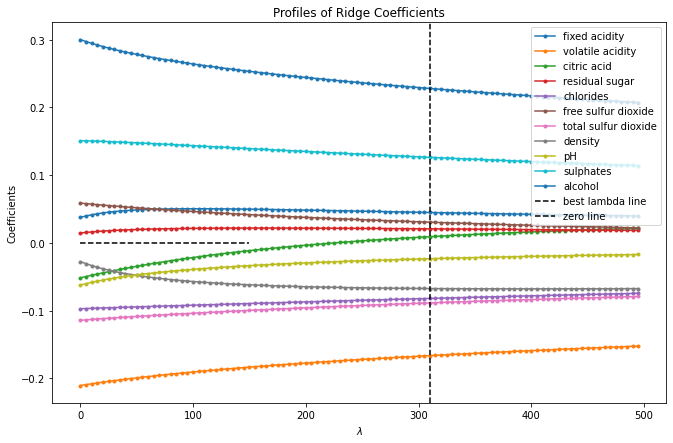

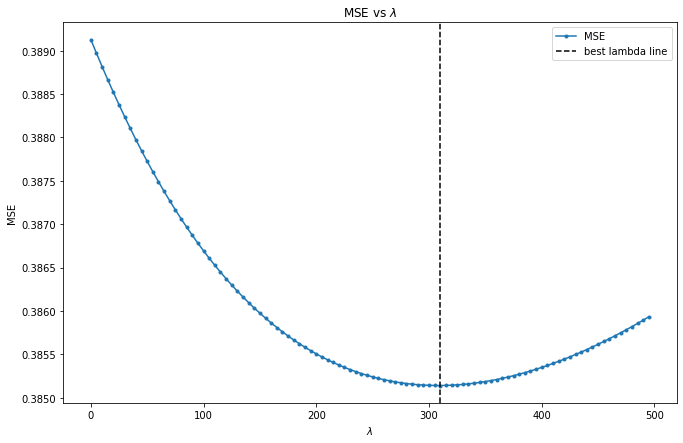

Optimal Lambda:  [310]
Optimal beta values: 
 [[ 5.66692729]
 [ 0.04495328]
 [-0.16637283]
 [ 0.00924402]
 [ 0.02081024]
 [-0.08192692]
 [ 0.03064249]
 [-0.08850565]
 [-0.06731788]
 [-0.02326183]
 [ 0.12640177]
 [ 0.22806235]]
MSE for test set: 0.484350262245405


In [ ]:

#SEARCH FOR THE BEST LAMBDA VALUE   
#validation sets convert to numpy form
X_valid=np.ones((x_valid.shape[0],x_valid.shape[1]+1))
X_valid[:,1:X_valid.shape[1]]=x_valid.to_numpy()


#calculate MSE values for each beta value and plot them
MSE_array=np.array([]) #initiate lambda best
for lamb in lambda_range:
  beta_temp=cal_beta(lamb)
  beta_temp=np.vstack((beta_0,beta_temp))
  y_pred=X_valid.dot(beta_temp)
  #y_pred=x_valid.dot(beta_temp)
  MSE=mean_squared_error(y_valid, y_pred)
  MSE_array=np.append(MSE_array,MSE)

Optimal_lambda=5*(np.where(MSE_array==np.amin(MSE_array))[0])#find the optimal lambda value

#plot feature coefficients vs lambda
plt.figure(figsize=(11,7))

plt.plot(lambda_range,beta_matrix[0,:],marker='.', label="fixed acidity")
plt.plot(lambda_range,beta_matrix[1,:],marker='.', label="volatile acidity")
plt.plot(lambda_range,beta_matrix[2,:],marker='.', label="citric acid")
plt.plot(lambda_range,beta_matrix[3,:],marker='.', label="residual sugar")
plt.plot(lambda_range,beta_matrix[4,:],marker='.', label="chlorides")
plt.plot(lambda_range,beta_matrix[5,:],marker='.', label="free sulfur dioxide")
plt.plot(lambda_range,beta_matrix[6,:],marker='.', label="total sulfur dioxide")
plt.plot(lambda_range,beta_matrix[7,:],marker='.', label="density")
plt.plot(lambda_range,beta_matrix[8,:],marker='.', label="pH")
plt.plot(lambda_range,beta_matrix[9,:],marker='.', label="sulphates")
plt.plot(lambda_range,beta_matrix[10,:],marker='.', label="alcohol")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.plot((0, 150), (0, 0), 'k--',label="zero line")
plt.title('Profiles of Ridge Coefficients')
plt.ylabel('Coefficients')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(11,7))
plt.plot(lambda_range,MSE_array,marker='.',label="MSE")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.title('MSE vs $\lambda$')
plt.ylabel('MSE')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

ridge0=cal_beta(0)

#calculate optimal predited y vlaue
beta_optimal=np.vstack((beta_0,cal_beta(Optimal_lambda)))
y_pred=X_test.dot(beta_optimal)

#calculate the MSE value
MSE_test=mean_squared_error(y_test, y_pred)
print("Optimal Lambda: ",Optimal_lambda)
print("Optimal beta values: \n",beta_optimal)
print("MSE for test set:",MSE_test)



The test results improves the MSE compare to the result of Ridege regression ,adn the MSE is lower than the baseline MSE

ADOPTING LASSO REGRESSION

In [ ]:
#LASSO REGRESSION FUNCTION
def cal_lasso(lamb):
  lasso=Lasso(alpha=lamb)
  lasso_coef=lasso.fit(X,y_train).coef_
  return lasso_coef

#PLOT FOR DIFFERENT BETA VALUES CORRESPONDING TO DIFFERENT LAMBDA
#create matrix for storing plotting data
beta_matrix=np.empty([x_train.shape[1], 1])
lambda_range=np.arange(0.001,0.2,0.002)

for lamb in lambda_range:
  if lamb==0.001:
    beta_matrix=cal_lasso(lamb).reshape((x_train.shape[1],1))
  else:
    beta_matrix=np.concatenate((beta_matrix,cal_lasso(lamb).reshape((x_train.shape[1],1))),axis=1)


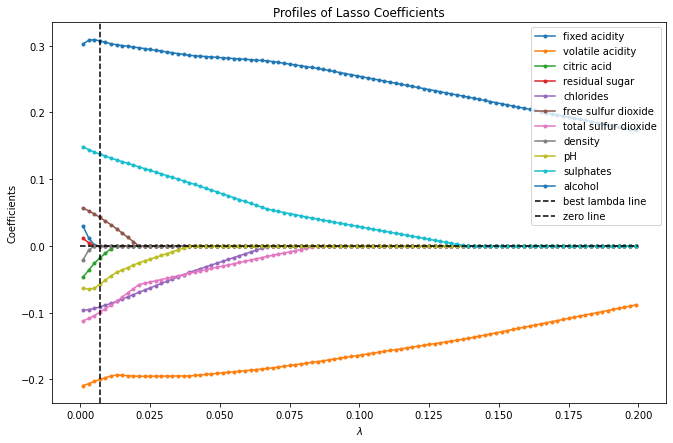

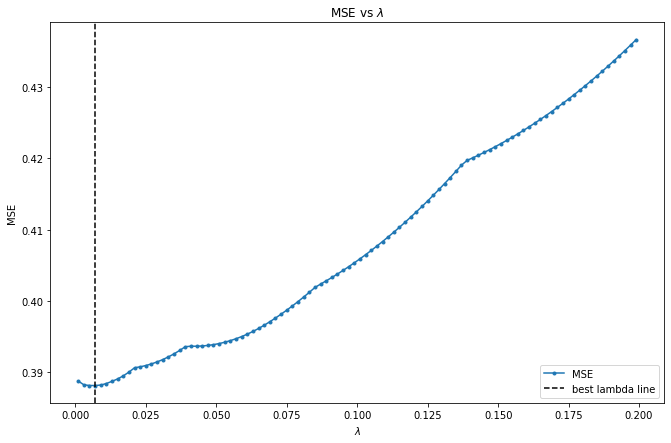

Optimal Lambda:  [0.007]
Optimal beta values: 
 [[ 5.66692729]
 [ 0.        ]
 [-0.19998087]
 [-0.0179672 ]
 [ 0.        ]
 [-0.09127699]
 [ 0.04271797]
 [-0.09934385]
 [-0.        ]
 [-0.05767683]
 [ 0.1376537 ]
 [ 0.30712191]]
MSE for test set: 0.4861063126929139


In [ ]:
#FIND OPTIMAL LAMBDA

#calculate MSE values for each beta
MSE_array=[] 
for lamb in lambda_range:
  beta_temp=cal_lasso(lamb)
  beta_temp=np.transpose(np.append(beta_0,beta_temp))
  y_pred=X_valid.dot(beta_temp)
  MSE=mean_squared_error(y_valid, y_pred)
  MSE_array=np.append(MSE_array,MSE)
 
Optimal_lambda=0.001+0.002*(np.where(MSE_array==np.amin(MSE_array))[0])#find the optimal lambda value

#plot features coefficient vs lambda
plt.figure(figsize=(11,7))


plt.plot(lambda_range,beta_matrix[0,:],marker='.', label="fixed acidity")
plt.plot(lambda_range,beta_matrix[1,:],marker='.', label="volatile acidity")
plt.plot(lambda_range,beta_matrix[2,:],marker='.', label="citric acid")
plt.plot(lambda_range,beta_matrix[3,:],marker='.', label="residual sugar")
plt.plot(lambda_range,beta_matrix[4,:],marker='.', label="chlorides")
plt.plot(lambda_range,beta_matrix[5,:],marker='.', label="free sulfur dioxide")
plt.plot(lambda_range,beta_matrix[6,:],marker='.', label="total sulfur dioxide")
plt.plot(lambda_range,beta_matrix[7,:],marker='.', label="density")
plt.plot(lambda_range,beta_matrix[8,:],marker='.', label="pH")
plt.plot(lambda_range,beta_matrix[9,:],marker='.', label="sulphates")
plt.plot(lambda_range,beta_matrix[10,:],marker='.', label="alcohol")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.plot((0, 0.2), (0, 0), 'k--',label="zero line")
plt.title('Profiles of Lasso Coefficients')
plt.ylabel('Coefficients')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(11,7))
plt.plot(lambda_range,MSE_array,marker='.',label="MSE")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.title('MSE vs $\lambda$')
plt.ylabel('MSE')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

#CALCULATE MSE ON TEST SET WITH OPTIMAL LAMBDA VALUE
#convert test data to numpy form
X_test=np.ones((x_test.shape[0],x_test.shape[1]+1))
X_test[:,1:X_test.shape[1]]=x_test.to_numpy()

#calculate optimal predited y vlaue
beta_optimal=np.hstack((beta_0,cal_lasso(Optimal_lambda)))
y_pred=X_test.dot(beta_optimal)

#calculate the MSE value
MSE_test=mean_squared_error(y_test, y_pred)
print("Optimal Lambda: ",Optimal_lambda)
print("Optimal beta values: \n",beta_optimal.reshape((12,1)))
print("MSE for test set:",MSE_test)


From the lasso coefficients profile, it can clearly show that the four most significant features in decending order are 'alcohol', 'volatile acidity','sulphates', which matches with their Z-score values. The second plot shows improvement of the MSE values for test set, and the lambda is chose to be 0.012. The MSE values for test set is better than the MSE base case

Repeat 3 methods with non linearized features

Z-score for features: 
 [[249.37249657]
 [  1.52746985]
 [ -6.73482848]
 [ -0.99321813]
 [  0.80593316]
 [ -3.73413381]
 [  2.08685376]
 [ -4.11483607]
 [ -1.91414212]
 [ -1.97485086]
 [  6.10517505]
 [  9.88643533]]
MSE for linear regression without regularization:  0.485011730787423
MSE base value:  0.66109375


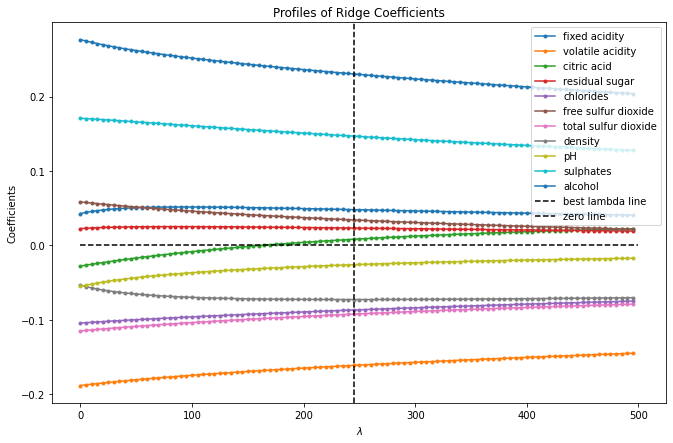

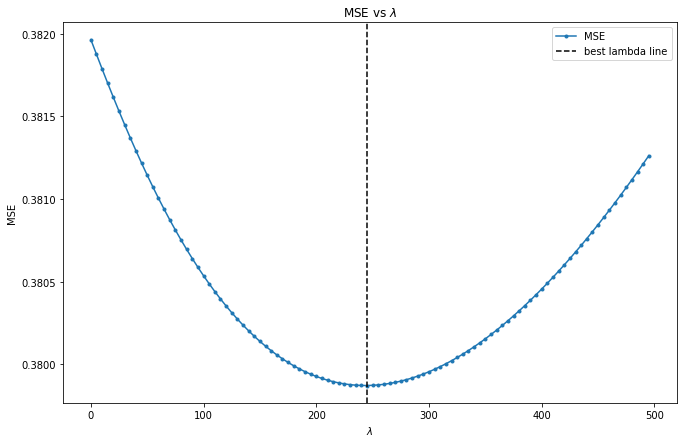

Optimal Lambda:  [245]
Optimal beta values: 
 [[ 5.66692729]
 [ 0.04798598]
 [-0.16132316]
 [ 0.00818552]
 [ 0.02323071]
 [-0.08688424]
 [ 0.03412309]
 [-0.09238966]
 [-0.07282322]
 [-0.02600159]
 [ 0.1467696 ]
 [ 0.23032864]]
MSE for test set: 0.4822891887701221


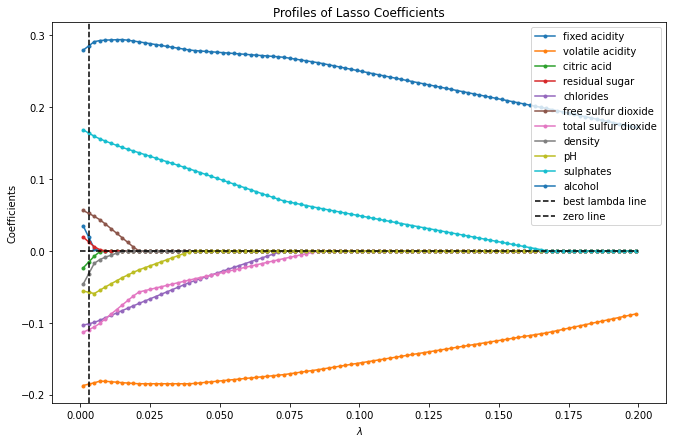

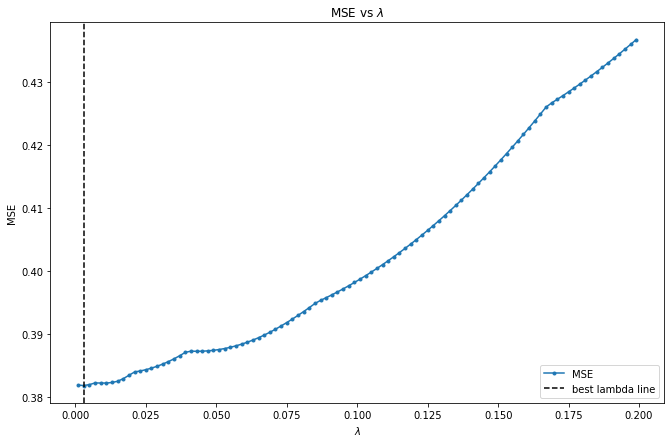

Optimal Lambda:  [0.003]
Optimal beta values: 
 [ 5.66692729  0.01913917 -0.18552898 -0.01551031  0.01253321 -0.10151751
  0.05221336 -0.10961252 -0.03186269 -0.05764818  0.16407285  0.28538131]
MSE for test set: 0.4841141845132192


In [ ]:
#apply non-linear functions to features
winequality_df = pd.read_csv("winequality-red.csv", sep=';', header='infer')

winequality_df['fixed acidity']=np.sqrt(winequality_df['fixed acidity'])
winequality_df['pH']=np.sqrt(winequality_df['pH'])
winequality_df['volatile acidity']=np.sqrt(winequality_df['volatile acidity'])
winequality_df['citric acid']=np.sqrt(winequality_df['citric acid'])
#winequality_df['residual sugar']=np.sqrt(winequality_df['residual sugar'])
#winequality_df['chlorides']=np.sqrt(winequality_df['chlorides'])
#winequality_df['total sulfur dioxide']=np.sqrt(winequality_df['total sulfur dioxide'])
winequality_df['density']=np.sqrt(winequality_df['density'])
winequality_df['sulphates']=np.sqrt(winequality_df['sulphates'])
#winequality_df['alcohol']=np.sqrt(winequality_df['alcohol'])
#===============================================================================
"""
Non linear functions including f(x)=x^2, f(x)=sqrt(x), f(x)=e^x are being applied on the features
however only when f(x)=sqrt(x) is applied to the features, the MSE value calculated for test set
decreases compare to the case when no functions are applied to the features. However, the MSE 
result later will show that although the decrements are consistant for MSE results of all three
methods, the magnitude is very small. The explanation of random chance can not be fully excluded

"""
#===============================================================================

# DIVIDE TO DATA SETS
train_data, remain_data = train_test_split(winequality_df, test_size=0.2, random_state=50, shuffle=True)
valid_data, test_data=train_test_split(remain_data, test_size=0.5, random_state=50, shuffle=True)


#form x and y sets
x_train=train_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_train=train_data[['quality']]
x_valid=valid_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_valid=valid_data[['quality']]
x_test=test_data[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y_test=test_data[['quality']]

#replace nan to 0
x_train = x_train.replace(np.nan, 0)
y_train = y_train.replace(np.nan,0)
x_valid = x_valid.replace(np.nan, 0)
y_valid = y_valid.replace(np.nan, 0)
x_test = x_test.replace(np.nan, 0)
y_test = y_test.replace(np.nan, 0)

#NORMALIZE DATA SETS
x_train=(x_train-x_train.mean())/x_train.std(ddof=0)
x_valid=(x_valid-x_valid.mean())/x_valid.std(ddof=0)
x_test=(x_test-x_test.mean())/x_test.std(ddof=0)

# PERFORM LINEAR REGRESSION WITHOUT REGULARIZATION
#calculate beta 
X=np.ones((x_train.shape[0],x_train.shape[1]+1))
X[:,1:X.shape[1]]=x_train
beta_base=np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X)).dot(y_train)

# CALCULATE Z-SCORE
#calculate standard error
SE=x_train.sem(axis=0).to_numpy().reshape(x_train.shape[1],1)
SE=np.vstack((y_train.sem(axis=0).to_numpy(),SE)) #standard error
z_score=np.divide(beta_base,SE) #z score
print("Z-score for features: \n",z_score)

#CALCULATE MEAN SQUARE ERROR
#convert to numpy format
X_test=np.ones((x_test.shape[0],x_test.shape[1]+1))
X_test[:,1:X_test.shape[1]]=x_test.to_numpy()
y_pred=X_test.dot(beta_base)
y_test=y_test.to_numpy()
MSE_test=mean_squared_error(y_test, y_pred)
print("MSE for linear regression without regularization: ",MSE_test)

#CALCULATE BASELINE MSE
y_pred=np.full((y_test.shape[0], 1), y_test.mean())
MSE_base=mean_squared_error(y_test,y_pred)
print("MSE base value: ",MSE_base)

#ADOPTING RIDGE
#form X matrix
X=x_train

#FUNCTION FOR CALCULATING BETAS
def cal_beta(lamb):
  beta=np.linalg.inv(np.transpose(X).dot(X)+lamb*np.eye(X.shape[1])).dot(np.transpose(X)).dot(y_train)
  #ridge_reg = Ridge(alpha=lamb)
  #ridge_reg.fit(X, y_train)
  #beta = np.transpose(ridge_reg.coef_)
  return beta

  #PLOT FOR DIFFERENT BETA VALUES CORRESPONDING TO DIFFERENT LAMBDA
#create matrix for storing plotting data
beta_matrix=np.empty([x_train.shape[1], 1])
lambda_range=np.arange(0,500,5)

#calculate beta0
beta_0=y_train.mean(axis=0).values

#fill beta_matrix
for lamb in lambda_range:
  if lamb==0:
    beta_matrix=cal_beta(lamb)
  else:
    beta_matrix=np.concatenate((beta_matrix,cal_beta(lamb)),axis=1)

#SEARCH FOR THE BEST LAMBDA VALUE   
#validation sets convert to numpy form
X_valid=np.ones((x_valid.shape[0],x_valid.shape[1]+1))
X_valid[:,1:X_valid.shape[1]]=x_valid.to_numpy()


#calculate MSE values for each beta value and plot them
MSE_array=np.array([]) #initiate lambda best
for lamb in lambda_range:
  beta_temp=cal_beta(lamb)
  beta_temp=np.vstack((beta_0,beta_temp))
  y_pred=X_valid.dot(beta_temp)
  #y_pred=x_valid.dot(beta_temp)
  MSE=mean_squared_error(y_valid, y_pred)
  MSE_array=np.append(MSE_array,MSE)

Optimal_lambda=5*(np.where(MSE_array==np.amin(MSE_array))[0])#find the optimal lambda value

#plot feature coefficients vs lambda
plt.figure(figsize=(11,7))

plt.plot(lambda_range,beta_matrix[0,:],marker='.', label="fixed acidity")
plt.plot(lambda_range,beta_matrix[1,:],marker='.', label="volatile acidity")
plt.plot(lambda_range,beta_matrix[2,:],marker='.', label="citric acid")
plt.plot(lambda_range,beta_matrix[3,:],marker='.', label="residual sugar")
plt.plot(lambda_range,beta_matrix[4,:],marker='.', label="chlorides")
plt.plot(lambda_range,beta_matrix[5,:],marker='.', label="free sulfur dioxide")
plt.plot(lambda_range,beta_matrix[6,:],marker='.', label="total sulfur dioxide")
plt.plot(lambda_range,beta_matrix[7,:],marker='.', label="density")
plt.plot(lambda_range,beta_matrix[8,:],marker='.', label="pH")
plt.plot(lambda_range,beta_matrix[9,:],marker='.', label="sulphates")
plt.plot(lambda_range,beta_matrix[10,:],marker='.', label="alcohol")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.plot((0, 500), (0, 0), 'k--',label="zero line")
plt.title('Profiles of Ridge Coefficients')
plt.ylabel('Coefficients')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

#plot corresponding MSE vs lambda
plt.figure(figsize=(11,7))
plt.plot(lambda_range,MSE_array,marker='.',label="MSE")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.title('MSE vs $\lambda$')
plt.ylabel('MSE')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

ridge0=cal_beta(0)

#calculate optimal predited y vlaue
beta_optimal=np.vstack((beta_0,cal_beta(Optimal_lambda)))
y_pred=X_test.dot(beta_optimal)

#calculate the MSE value
MSE_test=mean_squared_error(y_test, y_pred)
print("Optimal Lambda: ",Optimal_lambda)
print("Optimal beta values: \n",beta_optimal)
print("MSE for test set:",MSE_test)

#LASSO REGRESSION FUNCTION
def cal_lasso(lamb):
  lasso=Lasso(alpha=lamb)
  lasso_coef=lasso.fit(X,y_train).coef_
  return lasso_coef

#PLOT FOR DIFFERENT BETA VALUES CORRESPONDING TO DIFFERENT LAMBDA
#create matrix for storing plotting data
beta_matrix=np.empty([x_train.shape[1], 1])
lambda_range=np.arange(0.001,0.2,0.002)

for lamb in lambda_range:
  if lamb==0.001:
    beta_matrix=cal_lasso(lamb).reshape((x_train.shape[1],1))
  else:
    beta_matrix=np.concatenate((beta_matrix,cal_lasso(lamb).reshape((x_train.shape[1],1))),axis=1)

#FIND OPTIMAL LAMBDA

#calculate MSE values for each beta
MSE_array=[] 
for lamb in lambda_range:
  beta_temp=cal_lasso(lamb)
  beta_temp=np.transpose(np.append(beta_0,beta_temp))
  y_pred=X_valid.dot(beta_temp)
  MSE=mean_squared_error(y_valid, y_pred)
  MSE_array=np.append(MSE_array,MSE)
 
Optimal_lambda=0.001+0.002*(np.where(MSE_array==np.amin(MSE_array))[0])#find the optimal lambda value

#plot feature coefficients vs lambda
plt.figure(figsize=(11,7))


plt.plot(lambda_range,beta_matrix[0,:],marker='.', label="fixed acidity")
plt.plot(lambda_range,beta_matrix[1,:],marker='.', label="volatile acidity")
plt.plot(lambda_range,beta_matrix[2,:],marker='.', label="citric acid")
plt.plot(lambda_range,beta_matrix[3,:],marker='.', label="residual sugar")
plt.plot(lambda_range,beta_matrix[4,:],marker='.', label="chlorides")
plt.plot(lambda_range,beta_matrix[5,:],marker='.', label="free sulfur dioxide")
plt.plot(lambda_range,beta_matrix[6,:],marker='.', label="total sulfur dioxide")
plt.plot(lambda_range,beta_matrix[7,:],marker='.', label="density")
plt.plot(lambda_range,beta_matrix[8,:],marker='.', label="pH")
plt.plot(lambda_range,beta_matrix[9,:],marker='.', label="sulphates")
plt.plot(lambda_range,beta_matrix[10,:],marker='.', label="alcohol")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.plot((0, 0.2), (0, 0), 'k--',label="zero line")
plt.title('Profiles of Lasso Coefficients')
plt.ylabel('Coefficients')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

#plot MSE vs lambda
plt.figure(figsize=(11,7))
plt.plot(lambda_range,MSE_array,marker='.',label="MSE")
plt.axvline(x=Optimal_lambda,ls='--',c='k',label="best lambda line")
plt.title('MSE vs $\lambda$')
plt.ylabel('MSE')
plt.xlabel('$\lambda$')
plt.legend(loc='best')
plt.show()

#CALCULATE MSE ON TEST SET WITH OPTIMAL LAMBDA VALUE
#convert test data to numpy form
X_test=np.ones((x_test.shape[0],x_test.shape[1]+1))
X_test[:,1:X_test.shape[1]]=x_test.to_numpy()

#calculate optimal predited y vlaue
beta_optimal=np.hstack((beta_0,cal_lasso(Optimal_lambda)))
y_pred=X_test.dot(beta_optimal)

#calculate the MSE value
MSE_test=mean_squared_error(y_test, y_pred)
print("Optimal Lambda: ",Optimal_lambda)
print("Optimal beta values: \n",beta_optimal)
print("MSE for test set:",MSE_test)